In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from venn import venn

In [2]:
s1_links = pd.read_csv("xiFDR_results/xiFDR_S1_deiso_top2_all_CSMs/1perc_residue_Links_xiFDR2.2.1.csv")
s1_links = s1_links[(s1_links["Decoy1"] == False) & (s1_links["Decoy2"] == False)]
s2_links = pd.read_csv("xiFDR_results/xiFDR_S2_deiso_top2_all_CSMs/1perc_residue_Links_xiFDR2.2.1.csv")
s2_links = s2_links[(s2_links["Decoy1"] == False) & (s2_links["Decoy2"] == False)]
s3_links = pd.read_csv("xiFDR_results/xiFDR_S3_deiso_top2_all_CSMs/1perc_residue_Links_xiFDR2.2.1.csv")
s3_links = s3_links[(s3_links["Decoy1"] == False) & (s3_links["Decoy2"] == False)] 

In [3]:
def barplot(labels, counts, colors, title):
    fig, ax = plt.subplots()
    ax.set_xlabel("Replicate")
    ax.set_ylabel("Crosslinks at 1% FDR")
    ax.set_title(title)
    bars = ax.bar(labels, counts, color = colors)
    ax.bar_label(bars)
    return plt

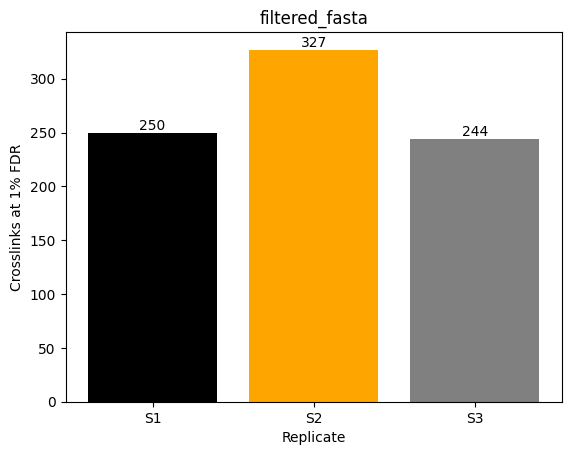

In [4]:
barplot(["S1", "S2", "S3"], [s1_links.shape[0], s2_links.shape[0], s3_links.shape[0]], ["black", "orange", "grey"], "filtered_fasta");

In [5]:
def get_crosslinks(df):
    xl = set()
    for i, row in df.iterrows():
        current_xl = "--".join(sorted([str(row["Protein1"]).strip() + "_" + str(row["fromSite"]).strip(), str(row["Protein2"]).strip() + "_" + str(row["ToSite"]).strip()]))
        xl.add(current_xl)
    return xl

In [6]:
s1 = get_crosslinks(s1_links)
s2 = get_crosslinks(s2_links)
s3 = get_crosslinks(s3_links)
print(f"s1: {len(s1)}, s2: {len(s2)}, s3: {len(s3)}")

s1: 250, s2: 327, s3: 244


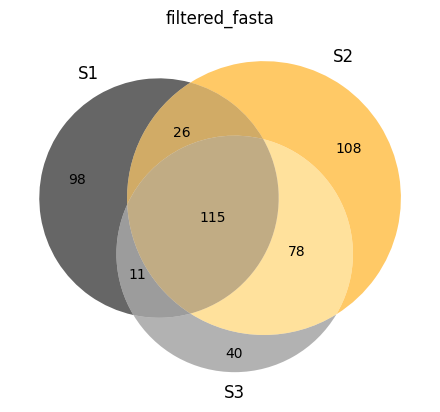

In [7]:
venn(s1, s2, s3, labels = ["S1", "S2", "S3"], colors = ["black", "orange", "grey"], title = "filtered_fasta");

In [8]:
f"Total crosslinks at 1% FDR across S1, S2 and S3: {len(s1.union(s2, s3))}"

'Total crosslinks at 1% FDR across S1, S2 and S3: 476'